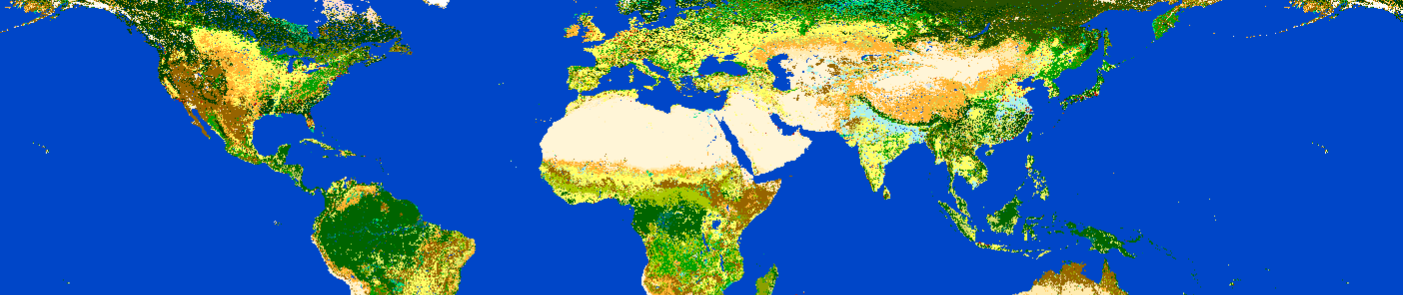

# <center>ANÁLISE GLOBAL DE USO E COBERTURA DA TERRA A PARTIR DE DADOS ESA CCI-LC</center>

#### _<center>Instituto Nacional de Pesquisas Espaciais, São José dos Campos - SP, Brasil</center>_ 
#### _<center>¹Lorena de Moura Joia Gomes; ²Isadora Haddad Ruiz</center>_
#### _<center>{¹lorena.joia; ²isadora.ruiz}@inpe.br</center>_ 

### Resumo
Ações que promovam o monitoramento da dinâmica da cobertura da terra são primordiais para o desenvolvimento sustentável global. Assim, informações geoespaciais tem permitido cada vez mais o acesso a dados em diferentes escalas de tempo e espaço, o que amplia ações intergovernamentais em áreas como mudanças climáticas, suprimento de alimentos, conservação da biodiversidade e outros. Neste contexto, o objetivo do trabalho foi analisar dados do produto _Climate Change Initiative Land Cover_ (CCI-LC) da ESA, no período de 2000 a 2015, através da linguagem de programação _Python_ para verificar as mudanças de cobertura da terra.

### Materiais e métodos
A análise proposta foi aplicada em escala global para os anos 2000, 2005, 2010 e 2015, com a finalidade de detectar mudanças nas classes temáticas de cobertura da terra no período. O produto empregado no estudo foi o _Land Cover_ da _European Space Agency_ (Agência Espacial Europeia - ESA), que possui mapeamento em nível global, resolução espacial de 300 metros e resolução temporal anual, entre os anos de 1992 a 2015. Os dados e documentação podem ser adquiridos pelo site [CCI-LC](http://maps.elie.ucl.ac.be/CCI/viewer/index.php) e estão disponpiveis para [_download_](http://maps.elie.ucl.ac.be/CCI/viewer/download.php) gratuitamente.

O projeto CCI foi criado para antender a demanda da área científica de mudanças climáticas globais, cujo os mapas foram derivados da integração de cinco sensores imageadores (AVHRR, 1992-1999; SPOT, 1999-2013; MERIS, 2003-2012;  PROBA-V, 2014-2015). A classificação ocorre por intermédio de um algoritmo a partir de produtos de reflectância da superfície, subdivididos em uma grade global de 72 x 36 (5° x 5°). O produto gerado possui 22 classes temáticas de cobertura da terra que visam atender, de forma geral, todo o planeta, mas também conta com uma classificação mais detalhada para aplicações em escala regional. Cada pixel da imagem recebe um valor de classe (Figura 1), onde mudanças são detectadas se essas persistem por dois anos ou mais. 

Para este trabalho as classes temáticas foram adaptadas com base na classificação utilizada pelo IPCC ( _Intergovernmental Panel on Climate Change_ ) e podem ser observadas na tabela 1. Informações adicionais sobre as classes temáticas do CCI-LC podem ser encontradas na [documentação](http://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-Ph2-PUGv2_2.0.pdf) .


Classes (adaptado) | Classificação IPCC        |Classe temática (CCI-LC)
:---------:        | :---------                | :------:
0                  | Sem dados (N)            | 0
1                  | Agricultura (A)          | 10, 11, 12, 20, 30, 40
2                  | Floresta (F)             | 50, 60, 61, 62, 70, 71, 72, 80, 81, 82, 90, 100, 110, 160, 170
3                  | Prado, estepe e savana (G)             | 130
4                  | Áreas alagadas (L)       | 180
5                  | Urbano (U)         | 190
6                  | Vegetação arbustiva (B)  | 120, 121, 122
7                  | Líquens e musgos (M)    | 140
8                  | Vegetação esparsa (P)        | 150, 151, 152, 153
9                  | Área descoberta (D)             | 200, 201, 202
10                 | Água (W)                 |210
11                 | Gelo permanente (S)                   | 220            

<center>Tabela 1 - Classes temáticas de cobertura da terra (adaptado)</center>
    
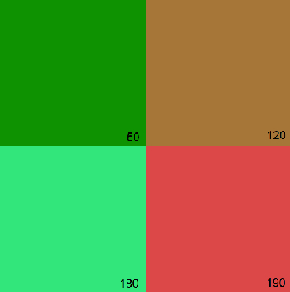

<center>Figura 1 - Valores de pixels com classificação CCI-LC</center>

A etapa de processamento foi realizada com base na linguagem de programação _Python_ , em vista de promover a replicabilidade do código estruturado em outras aplicações, em busca de aperfeiçoamento e contribuição para a prática de ciência aberta. A linguagem _Python_ vem sendo amplamente utilizada pela comunidade científica e outros setores, com aplicações em _softwares_ livres, além de contar com bibliotecas diversas e documentação acessível.

Os procedimentos adotados para processar e analisar os dados são apresentado nos tópicos seguintes neste documento. Como resultado da análise foi elaborado um [reletório](https://github.com/irhaddad), onde as considerações são apresentadas com mais detalhes. 

### Etapas do processamento

#### _1. Importar bibliotecas_

O dado geoespacial CCI-LC constitui uma matriz _raster_ e para sua manipulação e processamento são necessárias bibliotecas como:
- [GDAL](https://gdal.org/index.html), a qual possibilita a abertura, armazenamento, e manipulação de dados  _raster_ ;
- [Numpy](https://numpy.org/doc/), permite a manipulação de elementos da matriz com ampla disponibilidade de funções e módulos de aplicação;
- [Pandas](https://pandas.pydata.org/), possibilita a manipulação e análise de dados;
- [Matplotlib](https://matplotlib.org/index.html), utilizada para visualizar os dados e elementos gráficos;
- [Código cores](https://plotly.com/python/discrete-color/);
- [Plotly](https://plotly.com/python-api-reference/index.html), biblioteca especifíca para plotar o diagrama de Sankey.

As bibliotecas foram instaladas no ambiente criado para o desenvolvimento desse trabalho, no pacote ANACONDA. Após, foi criado um _kernel_ denominado Projeto na plataforma Jupyter, onde todo o processamento e elaboração dos códigos foram realizados.

In [ ]:
#importar bibliotecas
from osgeo import gdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go         #figuras, gráficos e tabelas
import plotly                             #figuras, gráficos e tabelas
import plotly.express as px               #exploração rápida de dados e geração de figuras
import plotly.figure_factory as ff        #gráficos e tabelas

#indicar exceções 
from gdalconst import *
gdal.UseExceptions()

#### _2. Validar metadados_
##### 2.1. Abrir arquivo
Esta etapa refere-se a importação e abertura dos arquivos na interface de manipulação dos dados. Para validação da abertura dos arquivos, foi adotado o teste nomeado como "boa prática" que deverá apontar "Erro" caso o procedimento não tenha sido executado com sucesso.

Como apresentado anteriormente, a análise será executada para o período de 2000 a 2015, com intervalo de 5 anos. Para replicabilidade do código os anos serão nomeados como 0 (ano inicial = 2000), 1 (2005), 2 (2010) e 3 (2015), possibilitando a incorporação de outros anos que não sejam os trabalhados nesse trabalho.

In [ ]:
#importar arquivo do diretório de armazenamento
filename_0 = 'C:/Users/isado/SP/sp_2000.tif'
filename_1 = 'C:/Users/isado/SP/sp_2005.tif'
filename_2 = 'C:/Users/isado/SP/sp_2010.tif'
filename_3 = 'C:/Users/isado/SP/sp_2015.tif'

#nomear e abrir os arquivos   
dataset_0 = gdal.Open(filename_0, GA_ReadOnly)
dataset_1 = gdal.Open(filename_1, GA_ReadOnly)
dataset_2 = gdal.Open(filename_2, GA_ReadOnly)
dataset_3 = gdal.Open(filename_3, GA_ReadOnly)

#boa prática, para validar se a abertura dos arquivos ocorreu com sucesso:
try:
    dataset_0 = gdal.Open(filename_0, GA_ReadOnly)
    print('Arquivo P1Y-2000 aberto com sucesso!')
    dataset_1 = gdal.Open(filename_1, GA_ReadOnly)
    print('Arquivo P1Y-2005 aberto com sucesso!')
    dataset_2 = gdal.Open(filename_2, GA_ReadOnly)
    print('Arquivo P1Y-2010 aberto com sucesso!')
    dataset_3 = gdal.Open(filename_3, GA_ReadOnly)
    print('Arquivo P1Y-2015 aberto com sucesso!')
except:
    print('Erro na abertura do arquivo!')

##### _2.2. Metadado associado_ 
Para validar as informaçõe associadas aos arquivos, quanto as coordenadas geográficas, resolução espacial e orientação, os processos abaixo foram executados. Caso os dados apresentem desvios de informações o processamento não poderá ser realizado, pois os arquivos apresentarão desencontros que podem levar a resultados errôneos.

In [ ]:
#metadados associado, consulta aos elementos ([0] coordenada x;[1] "resolução espacial"; [2] orientação north; 
#[3] coordenada y; [4] north; [5] altura do pixel)
print('Metadados contendo informações de georreferenciamento')
geotransform_0 = dataset_0.GetGeoTransform()
print('P1Y-2000:\n', geotransform_0)
print()
geotransform_1 = dataset_1.GetGeoTransform()
print('P1Y-2005:\n', geotransform_1)
print()
geotransform_2 = dataset_2.GetGeoTransform()
print('P1Y-2010:\n', geotransform_2)
print()
geotransform_3 = dataset_3.GetGeoTransform()
print('P1Y-2015:\n', geotransform_3)
print()

#checar sistema de coordenadas (https://spatialreference.org/)
sr_0 = dataset_0.GetProjectionRef()
sr_1 = dataset_1.GetProjectionRef()
sr_2 = dataset_2.GetProjectionRef()
sr_3 = dataset_3.GetProjectionRef()
print('Sistema de referência P1Y-2000:\n ', sr_0)
print()
print('Sistema de referência P1Y-2005:\n ', sr_1)
print()
print('Sistema de referência P1Y-2010:\n ', sr_2)
print()
print('Sistema de referência P1Y-2015:\n ', sr_3)
print()

#verificar compatibilidade de metadados (se todas as imagens possuem o mesmo sistema de coordenadas e sobreposição):
if (sr_0 == sr_1) and (sr_0 == sr_2):
    print("Sistema de referência iguais.")
elif (sr_0 == sr_3) and (sr_1 == sr_2):
    print("Sistema de referência iguais.")
elif (sr_1 == sr_3) and (sr_2 == sr_3):
    print("Sistema de referência igual.")
else:
    print("Metadados espaciais diferentes")

##### _2.3. Convertendo dado raster para matriz_
De forma complementar aos metadados, conhecer a estrutura do _raster_ (dimensões) é necessário para verificar se os arquivos são compativéis (apresentam a mesma quantidade de linhas e colunas) para realizar a análise dos dados. Como apresentado na documentação do produto, os arquivos são compostos por uma única banda, a qual foi selecionada para execussão dos processos. Inicialmente os arquivos foram transformados em matrizes individuais e obteve-se os valores mínimos e máximos dos pixels que compõem a imagem, para validar se os valores correspondem as classes temáticas estabelecidas pelo CCI-LC.

In [ ]:
#seleção da banda/arquivo
b_0 = dataset_0.GetRasterBand(1)
b_1 = dataset_1.GetRasterBand(1)
b_2 = dataset_2.GetRasterBand(1)
b_3 = dataset_3.GetRasterBand(1)

#tranformação do dado raster em matriz 
matriz_0 = b_0.ReadAsArray()
matriz_1 = b_1.ReadAsArray()
matriz_2 = b_2.ReadAsArray()
matriz_3 = b_3.ReadAsArray()
print( )

#obter dimensões do raster, x e y:
print('Arquivo:', '','(Linha',',', 'Coluna)')
print('P1Y-2000:', np.shape(matriz_0))
print('P1Y-2005:', np.shape(matriz_1))
print('P1Y-2010:', np.shape(matriz_2))
print('P1Y-2015:', np.shape(matriz_3))
print( )

#valor mínimo e máximo dos pixels para associar as classes temáticas de cobertura do solo. 
(menor, maior) = b_0.ComputeRasterMinMax()
print('Menor valor de P1Y-2000: ', menor)
print('Maior valor de P1Y-2000: ', maior)
print( )
(menor, maior) = b_1.ComputeRasterMinMax()
print('Menor valor de P1Y-2005: ', menor)
print('Maior valor de P1Y-2005: ', maior)
print( )
(menor, maior) = b_2.ComputeRasterMinMax()
print('Menor valor de P1Y-2010: ', menor)
print('Maior valor de P1Y-2010: ', maior)
print( )
(menor, maior) = b_3.ComputeRasterMinMax()
print('Menor valor de P1Y-2015: ', menor)
print('Maior valor de P1Y-2015: ', maior)
print( )

#### 3. Identificar mudanças nas matrizes
##### 3.1. Reclassificar classes temáticas de cobertura da terra
Os produtos CCI-LC apresentam classes temáticas que variam de 0 a 220, em intervalos de 10 e alguns valores intermediários definidos pela classificação regional, responsáveis pela definição dos tipos de cobertura da terra. Com isso, cada pixel da imagem é composto por um valor nesse intervalo, distribuido em 22 classes. Com o intuito de melhor visualização dos dados, as classes foram reclassificadas e adaptadas com base na classificação utilizada pelo IPCC (Tabela 1).

Para esta reclassificação as matrizes individuais foram agrupadas em uma matriz 3D, pensando também em caracterizar os fluxos de mudança na cobertura da terra. 

In [ ]:
#matriz 3D
transi = [matriz_0, matriz_1, matriz_2, matriz_3] 
matriz_t = np.array(transi)
print(matriz_t)

A etapa de reclassificação foi realizada a partir de iterações que determinam para cada elemento da matriz 3D uma nova classe. Como os pixels possuem valores entre 0 e 220, uma nova classificação foi adotada com valores entre 0 e 11, chamada de Classes (adaptado). Informações adicionais sobre a classificação podem ser consultadas na tabela 1. O propósito da iteração foi estabelecer novos valores para cada elemento da matriz com base na nova classe.

In [ ]:
#iterando sobre os valores da matriz para reclassificar
for i in range(len(transi)):
    transi[i][transi[i] == 0] = 0                               #Sem dados
    transi[i][(transi[i] >=  10) & (transi[i] <=  40)] = 1      #Agricultura
    
    transi[i][(transi[i] >=  50) & (transi[i] <=  90)] = 2      #Floresta
    transi[i][(transi[i] ==  100)] = 2                          #Floresta
    transi[i][(transi[i] == 110)] = 2                           #Floresta
    transi[i][(transi[i] ==  160)] = 2                          #Floresta
    transi[i][(transi[i] ==  170)] = 2                          #Floresta
    
    transi[i][(transi[i] == 130)] = 3                           #Prado, estepe e savana
    
    transi[i][(transi[i] == 180)] = 4                           #Áreas alagadas
    transi[i][(transi[i] == 190)] = 5                           #Urbano
    transi[i][(transi[i] >= 120) & (transi[i] <= 122)] = 6      #Vegetação arbustiva 
    
    transi[i][(transi[i] == 140)] = 7                           #Líquens e musgos
    transi[i][(transi[i] >= 150) & (transi[i] <= 153)] = 8      #Vegetação espersa
    transi[i][(transi[i] >= 200) & (transi[i] <= 202)] = 9      #Área descoberta 
    transi[i][(transi[i] == 210)] = 10                          #Água
    transi[i][(transi[i] == 220)] = 11                          #Gelo permanente
    
print("Classes reclassificadas para valores de: ", np.unique(transi))

A partir da união das matrizes reclassificadas, a etapa seguinte indicará as mudanças detectadas entre os anos, para isso foi indicado para cada varivável (ano_0, ano_1, ano_2 e ano_3) qual bloco dentro da matriz 3D "transi" corresponde ao ano de referência. Em seguida, as variáveis foram agregadas em uma lista, ordenadas em colunas, e associadas ao layer do ano de referência. 

In [ ]:
#indica uma sequência de matrizes ao longo de um eixo, dentro da matriz 3D, que deve ser associada a variável
ano_0 = np.concatenate(transi[0])
ano_1 = np.concatenate(transi[1])
ano_2 = np.concatenate(transi[2])
ano_3 = np.concatenate(transi[3])

#função usada para agregar os dados em uma "tabela" contendo linhas (quantidade de dados) e colunas (ano)
dataset = pd.DataFrame({'2000': ano_0, '2005': ano_1, '2010': ano_2, '2015': ano_3})
print("Valores dos pixels reclassificados\n", dataset)

Pensando em melhor visualizar as transições, as classes númericas foram substituidas por "códigos" em letras.

In [ ]:
#atribuindo códigos as classes para identificar transições
dataset_t = dataset.replace({0: 'N',
                             1: 'A',
                             2: 'F', 
                             3: 'G',
                             4: 'L', 
                             5: 'U',
                             6: 'B',
                             7: 'P',
                             8: 'M',
                             9: 'D',
                            10: 'W',
                            11: 'S'})

print("Valores de classes adaptadas codificados\n ", dataset_t)

A transição entre os anos foi então análisada com base na estrutura abaixo. Cada ano de referência (" _anot_ ") foi igualado ao acumulado de ano que ele representa, portando cada _pixel_ apresentou um valor igual ou diferente, entre os anos, indicando permanencia ou alteração na cobertura da terra. O ano inicial (0) é igual a ele mesmo, o ano seguinte (1) reune os valores/códigos detectados nele e no ano anterior. Subsequente os anos vão agregando as classes dos anos anteriores e indicando a do ano de referência, para assim visualizar as transições.  

In [ ]:
#indicando a tranisção entre os ano 3 carrega a sequencia de cobertura da terra de todos os outros anos que o antecede 
dataset_t['2000t'] = dataset_t['2000']
dataset_t['2005t'] = dataset_t['2000']  + dataset_t['2005']
dataset_t['2010t'] = dataset_t['2000']  + dataset_t['2005'] + dataset_t['2010']
dataset_t['2015t'] = dataset_t['2000']  + dataset_t['2005'] + dataset_t['2010'] + dataset_t['2015']

#drop remove o primeiro bloco de colunas (antes do igual) para visualizar apenas as transições
dataset_t = dataset_t.drop(['2000','2005', '2010','2015'], axis=1)

#agregação dos codigos para cada coluna, o indice antigo é adicionado a uma nova coluna e count vai agrega ocorrências idênticas
dataset_t = dataset_t.groupby(['2000t', '2005t','2010t','2015t']).size().reset_index(name='count')

print(dataset_t)

#### _3.2 Análise dos dados_

Inicialmente foi obtido o percentual de cobertura da terra por classe a cada ano, possibilitando identificar ocorrências predominantes e não ocorrências. Elementos gráficos foram utilizados para melhor visualização dos dados individuais e de forma comparativa.

Percentual de cobertura da terra por classe no ano de **2000**.

In [ ]:
#cálculo do percentual de cobertura da terra por classe temática
lista = []
def percentual(ano):
    class_0 = (np.count_nonzero(ano == 0) / len(ano))*100
    #lista.append(class_0)
    class_1 = (np.count_nonzero(ano == 1) / len(ano))*100
    #lista.append(class_1)
    class_2 = (np.count_nonzero(ano == 2) / len(ano))*100
    #lista.append(class_2)
    class_3 = (np.count_nonzero(ano == 3) / len(ano))*100
    #lista.append(class_3)
    class_4 = (np.count_nonzero(ano == 4) / len(ano))*100
    #lista.append(class_4)
    class_5 = (np.count_nonzero(ano == 5) / len(ano))*100
    #lista.append(class_5)
    class_6 = (np.count_nonzero(ano == 6) / len(ano))*100
    #lista.append(class_6)
    class_7 = (np.count_nonzero(ano == 7) / len(ano))*100
    #lista.append(class_7)
    class_8 = (np.count_nonzero(ano == 8) / len(ano))*100
    #lista.append(class_8)
    class_9 = (np.count_nonzero(ano == 9) / len(ano))*100
    #lista.append(class_9)
    class_10 = (np.count_nonzero(ano == 10) / len(ano))*100
    #lista.append(class_10)
    class_11 = (np.count_nonzero(ano == 11) / len(ano))*100
    #lista.append(class_11)
    return ('Sem dados:', round(class_0,4), 'Agricultura:', round(class_1,4), 'Floresta:', round(class_2,4),
           'Prado, estepe e savana:', round(class_3,4), 'Áreas alagadas:', round(class_4,4), 'Urbano', round(class_5,4),
           'Vegetação arbustiva:', round(class_6,4), 'Líquens e musgos:', round(class_7,4), 
            'Vegetação esparsa:', round(class_8,4), 'Área descoberta:', round(class_9,4),
           'Água:', round(class_10,4), 'Gelo permanente:', round(class_11,4))

lista_0 = (percentual(ano_0))
print('Percentual de cobertura da terra - 2000\n', lista_0)
print( )

In [ ]:
lista_1 = (percentual(ano_1))
print('Percentual de cobertura da terra - 2005\n', lista_1)

In [ ]:
lista_2 = (percentual(ano_2))
print('Percentual de cobertura da terra - 2010\n', lista_2)

In [ ]:
lista_3 = (percentual(ano_3))
print('Percentual de cobertura da terra - 2015\n', lista_3)

#### _3.3 Análise comparativa_ 
Comparar mudanças ao longo dos anos, entre as classes, e verificar aumento e redução.

In [ ]:
table_data = [['Classe temática', '2000', '2005', '2010', '2015'],
              ['Sem dados', lista_0[1], lista_1[1], lista_2[1], lista_3[1]],
              ['Agricultura', lista_0[3], lista_1[3], lista_2[3], lista_3[3]],
              ['Floresta', lista_0[5], lista_1[5], lista_2[5], lista_3[5]],
              ['Prado, estepe e savana', lista_0[7], lista_1[7], lista_2[7], lista_3[7]],
              ['Áreas alagadas', lista_0[9], lista_1[9], lista_2[9], lista_3[9]],
              ['Urbano', lista_0[11], lista_1[11], lista_2[11], lista_3[11]],
              ['Vegetação arbustiva', lista_0[13], lista_1[13], lista_2[13], lista_3[13]],
              ['Vegetação esparsa', lista_0[15], lista_1[15], lista_2[15], lista_3[15]],
              ['Líquens e musgos', lista_0[17], lista_1[17], lista_2[17], lista_3[17]],
              ['Área descoberta', lista_0[19], lista_1[19], lista_2[19], lista_3[19]],
              ['Água', lista_0[21], lista_1[21], lista_2[21], lista_3[21]],
              ['Gelo permanente', lista_0[23], lista_1[23], lista_2[23], lista_3[23]]]

fig = ff.create_table(table_data, height_constant=20)

fig.show()

In [ ]:
#convertendo tuplhas em listas
lista_a = list(lista_0)
lista_b = list(lista_1)
lista_c = list(lista_2)
lista_d = list(lista_3)

#selecionanto itens para plotagem
lista_00 = (lista_0[1], lista_0[3], lista_0[5], lista_0[7], lista_0[9], lista_0[11], 
            lista_0[13], lista_0[15], lista_0[17], lista_0[19], lista_0[21], lista_0[23])

lista_01 = (lista_1[1], lista_1[3], lista_1[5], lista_1[7], lista_1[9], lista_1[11], 
            lista_1[13], lista_1[15], lista_1[17], lista_1[19], lista_1[21], lista_1[23])

lista_02 = (lista_2[1], lista_2[3], lista_2[5], lista_2[7], lista_2[9], lista_2[11], 
            lista_2[13], lista_2[15], lista_2[17], lista_2[19], lista_2[21], lista_2[23])

lista_03 = (lista_3[1], lista_3[3], lista_3[5], lista_3[7], lista_3[9], lista_3[11], 
            lista_3[13], lista_3[15], lista_3[17], lista_3[19], lista_3[21], lista_3[23])

#convertendo para lista para array
size_0 = np.array(lista_00)
print(size_0)

size_1 = np.array(lista_01)
print(size_1)

size_2 = np.array(lista_02)
print(size_2)

size_3 = np.array(lista_03)
print(size_3)

In [ ]:
labels = ['Sem dados','Agricultura', 'Floresta',
          'Prado, estepe e savana',
          'Areas alagadas',
          'Urbano',
          'Vegetação Arbustiva',
          'Líquens e musgo',
          'Vegetação esparsa',
          'Área descoberta',
          'Água',
          'Gelo permanente']

sizes = [size_0]
sizes1 = [size_1]


# Criação da figure com uma linha e duas colunas. Figsize define o tamanho da
# figure
fig, eixos = plt.subplots(nrows=1, ncols=2, figsize=(20,10))


# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(size_0, autopct='%1.1f%%', colors=['#222A2A','#ffff64', '#006400', '#ffb432', 
                                                       '#00dc82', '#c31400','#966400', '#ffdcd2', 
                                                       '#ffebaf', '#dcdcdc', '#0046c8', '#ffffff'])

# Define o título deste gráfico
eixos[0].set_title('2000', fontsize = 20)

# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')

# Idem a acima, para o segundo gráfico de pizza
pie_2 = eixos[1].pie(size_1, autopct='%1.1f%%', startangle=90, colors=['#222A2A','#ffff64', '#006400', '#ffb432', 
                                                                       '#00dc82', '#c31400', '#966400', '#ffdcd2', 
                                                                       '#ffebaf', '#dcdcdc', '#0046c8', '#ffffff'])

eixos[1].set_title('2005', fontsize = 20)
plt.axis('equal')
# Ajusta o espaço entre os dois gráficos

plt.legend(labels,
         title='Classes de cobertura do solo', title_fontsize = 16,
         loc='right',
          bbox_to_anchor=(1,0.5,0.5,0))

plt.subplots_adjust(wspace=0.2)
plt.show()



#2010 e 2015
sizes2 = [size_2]
sizes3 = [size_3]

# Criação da figure com uma linha e duas colunas. Figsize define o tamanho da
# figure
fig, eixos = plt.subplots(nrows=1, ncols=2, figsize=(20,10))


# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(size_2, autopct='%1.1f%%', colors=['#222A2A','#ffff64', '#006400', '#ffb432', 
                                                       '#00dc82', '#c31400','#966400', '#ffdcd2', 
                                                       '#ffebaf', '#dcdcdc', '#0046c8', '#ffffff'])

# Define o título deste gráfico
eixos[0].set_title('2010', fontsize = 20)

# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')

# Idem a acima, para o segundo gráfico de pizza
pie_2 = eixos[1].pie(size_3, autopct='%1.1f%%', startangle=90, colors=['#222A2A','#ffff64', '#006400', '#ffb432', 
                                                                       '#00dc82', '#c31400', '#966400', '#ffdcd2', 
                                                                       '#ffebaf', '#dcdcdc', '#0046c8', '#ffffff'])

eixos[1].set_title('2015', fontsize = 20)
plt.axis('equal')
# Ajusta o espaço entre os dois gráficos

plt.legend(labels, title='Classes de cobertura do solo', title_fontsize = 16,
         loc='right', bbox_to_anchor=(1,0.5,0.5,0))


plt.subplots_adjust(wspace=0.2)
plt.show();

In [ ]:
dif_1 = ano_1 - ano_0
dif_2 = ano_2 - ano_1
dif_3 = ano_3 - ano_2

lista_ch = []

def change(dif):
    igual_1 = (np.count_nonzero(dif == 0)/len(ano_0))*100
    lista_ch.append(igual_1)
    mudan_1 = (np.count_nonzero(dif != 0)/len(ano_0))*100
    lista_ch.append(mudan_1)
    return lista_ch

ch_1 = (change(dif_1))
print('2000 > 2005\n','Igual:', ch_1[0], '\nMudança:', ch_1[1])
print( )

ch_2 = (change(dif_2))
print('2005 > 2010\n','Igual:', ch_2[0], '\nMudança:', ch_2[1])
print( )

ch_3 = (change(dif_3))
print('2010 > 2015\n','Igual:', ch_3[0], '\nMudança:', ch_3[1])
print( )

dif_1 = matriz_1 - matriz_0
dif_2 = matriz_2 - matriz_1
dif_3 = matriz_3 - matriz_2
           
plt.figure(figsize=(20, 5))
plt.suptitle('Detecção de mudanças na cobertura da terra', fontsize = 20)
plt.subplot(141)
plt.imshow(matriz_0, cmap = "plasma")
plt.title("Ano 2000 >", fontsize = 16)
plt.xticks([])
plt.yticks([])

plt.subplot(142)
plt.imshow(dif_1, cmap = "plasma")
plt.title("Ano 2005 >", fontsize = 16)
plt.xticks([])
plt.yticks([])
    
plt.subplot(143)
plt.imshow(dif_2, cmap = "plasma")
plt.title("Ano 2010 >", fontsize = 16)
plt.xticks([])
plt.yticks([])

plt.subplot(144)
plt.imshow(dif_3, cmap = "plasma")
plt.title("Ano 2015", fontsize = 16)
plt.xticks([])
plt.yticks([]);

In [ ]:
#array para identificar diferença entre classes
t_0 = np.array(lista_00)      #2000
t_1 = np.array(lista_01)      #2005
t_2 = np.array(lista_02)      #2010
t_3 = np.array(lista_03)      #2015

#obtendo as diferenças
dif_class_1 = t_1 - t_0      #2000 > 2005
dif_class_2 = t_2 - t_1      #2005 > 2010
dif_class_3 = t_3 - t_2      #2010 > 2015

table_data = [['Classe temática', 'Anos 2000 > 2005', 'Anos 2005 > 2010', 'Anos 2010 > 2015'],
              ['Sem dados', round(dif_class_1[0],4), round(dif_class_2[0],4), round(dif_class_3[0],4)],
              ['Agricultura', round(dif_class_1[1],4), round(dif_class_2[1],4), round(dif_class_3[1],4)],
              ['Floresta', round(dif_class_1[2],4), round(dif_class_2[2],4), round(dif_class_3[2],4)],
              ['Prado, estepe e savana', round(dif_class_1[3],4), round(dif_class_2[3],4), round(dif_class_3[3],4)],
              ['Áreas alagadas', round(dif_class_1[4],4), round(dif_class_2[4],4), round(dif_class_3[4],4)],
              ['Urbano', round(dif_class_1[5],4), round(dif_class_2[5],4), round(dif_class_3[5],4)],
              ['Vegetação arbustiva', round(dif_class_1[6],4), round(dif_class_2[6],4), round(dif_class_3[6],4)],
              ['Vegetação esparsa', round(dif_class_1[7],4), round(dif_class_2[7],4), round(dif_class_3[7],4)],
              ['Líquens e musgos', round(dif_class_1[8],4), round(dif_class_2[8],4), round(dif_class_3[8],4)],
              ['Área descoberta', round(dif_class_1[9],4), round(dif_class_2[9],4), round(dif_class_3[9],4)],
              ['Água', round(dif_class_1[10],4), round(dif_class_2[10],4), round(dif_class_3[10],4)],
              ['Gelo permanente', round(dif_class_1[11],4), round(dif_class_2[11],4), round(dif_class_3[11],4)]]

colorscale=[[0, 'rgb(179,179,179)'],[1, 'rgb(242,242,242)']]

fig = ff.create_table(table_data, height_constant=20, colorscale = colorscale)

fig.show()

##### 4. Resultados

- Pode-se identificar que a maior parte da área em análise é destinada a atividade agrícola (cerca de 50%), seguida de áreas de florestas (cerca de 15%), enquanto em terceiro e quarto lugares são ocupados por corpos d´água (aproximadamente 13%) e vegetação arbustiva (aproximadamente 11%), respectivamente. As outras classes, como prado, estepe e savana ocupam o valor aproximado de 4% da área e as outras classes ocorrem em uma pequena extensão, abaixo de 1%.


- Foi possível verificar ao longo dos anos que a classe de agricultura demonstrou redução no período analisado, floresta aumentou entre 2000 e 2010, e reduz de 2010 para 2015. A classe água exibe oscilação positiva e negativa na ordem de 0,01% entre os anos, enquanto vegetação arbustiva diminui no primeiro período (2000-2005) e aumente de 2005 a 2015. A classe urbano demonstrou aumento em todos os intervalos analisados, crescendo em média 0,1% a cada cinco anos.


- As mudanças foram de pequena ordem no período observando, não demonstrando grandes variações de cobertura da terra mantendo-se predominante as mesmas classes temáticas. Além disso, para melhor validação das transições, seria pertinente observar as transições impossíveis, ou seja, alterações de classes improváveis (ex: água, floresta, água, água). Este tipo de análise poderia direcionar investigações acerca da qualidade do produto CCI-LC.


- Outro aspecto observado acerca do produto CCI-LC refere-se a resolução espacial aplicada a escala regional e local. Como o mesmo foi desenvolvido para observações em escala global, alterações na ordem de estados (escala local) não demonstraram-se eficiente. Para confirmar essa hipótese sugerimos a mesma análise utilizando produtos com resolução espacial maior, um exemplo seria o MapBiomas (resolução espacial de 30 metros). 


#### 5. Referências

Almeida, C.A.; Coutinho, A.C.; Esquerdo, J.C.D.M.; Adami, M.; Venturieri, A.; Diniz, C.G.; Dessay, N.; Durieux, L.; Gomes, A.R. High spatial resolution land use and land cover mapping of the Brazilian Legal Amazon in 2008 using Landsat-5/TM and MODIS data. _Acta Amazonica_,  v. 46, n. 3, pp. 291-302, 2016.

Clewley, D.; Bounting, P.; Shepherd, J.; Gillingham, S.; Flood, N.; Dymond, J.; Lucas, R.; Armston, J.; Moghaddam, M. APython-Based Open Source System for Geographic Object-Based Image Analysis (GEOBIA)U tilizing Raster Attribute Tables. _Remote Sensing_ , v. 6, pp. 6111-6135, 2014, DOI: 10.3390/rs6076111.

Grekousis, G.; Mountrakis, G.; Kavouras, M. An overview of 21 global and 43 regional land-cover mapping products. _International Journal of Remote Sensing_ , 2015, DOI: 10.1080/01431161.2015.1093195.

Li, W.; MacBean, N.; Ciais, P.; Defourny, P.; Lamarche, C.; Bontemps, S.; Houghton, R.A.; Peng, S. Gross and net land cover changes in the main plant functional types derived from the annual ESA CCI land cover maps (1992–2015). _Earth System Science Data_ , v. 10, pp.  219–234, 2018.

**Apêndice**

Diagrama de Sankey, utilizado para observar as transições de classes ano a ano e verificar as substituções de cobertura da terra.

In [ ]:
df = dataset_t

def genSankey(df,cat_cols=['2000t','2005t','2010t','2015t'],value_cols='count',title='Diagrama de Sankey'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#0DF9FF','#FE00CE','#00FE35','#FF9900','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig


fig = genSankey(df,cat_cols=['2000t','2005t','2010t','2015t'],value_cols='count',title='Diagrama de Sankey')
plotly.offline.plot(fig, validate=False)